In [40]:
import numpy as np
import helper_functions as functions
import json

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from collections import Counter
import random
import texthero as hero

In [2]:
with open('young_subjects_full_study_json_list_march23.json', "r") as read_file:
    data_json_list = json.load(read_file)

In [3]:
len(data_json_list)

17335

### considering only 10 subjects - so tackling a small problem = 10 class classification
### focusing only on "membership" of word in list and discarding "order" component

### Countvectorizer

In [4]:
data_insights = []
for i in data_json_list:
    if len(i)>0:
        data_insights.append([i["subjectIndex"],i["sessionIndex"],i["listIndex"]])

In [5]:
data_insights

[[63, 1, 0],
 [63, 1, 1],
 [63, 1, 2],
 [63, 1, 3],
 [63, 1, 4],
 [63, 1, 5],
 [63, 1, 6],
 [63, 1, 7],
 [63, 1, 8],
 [63, 1, 9],
 [63, 1, 10],
 [63, 1, 11],
 [63, 1, 12],
 [63, 1, 13],
 [63, 1, 14],
 [63, 1, 15],
 [63, 2, 0],
 [63, 2, 1],
 [63, 2, 2],
 [63, 2, 3],
 [63, 2, 4],
 [63, 2, 5],
 [63, 2, 6],
 [63, 2, 7],
 [63, 2, 8],
 [63, 2, 9],
 [63, 2, 10],
 [63, 2, 11],
 [63, 2, 12],
 [63, 2, 13],
 [63, 2, 14],
 [63, 2, 15],
 [63, 3, 0],
 [63, 3, 1],
 [63, 3, 2],
 [63, 3, 3],
 [63, 3, 4],
 [63, 3, 5],
 [63, 3, 6],
 [63, 3, 7],
 [63, 3, 8],
 [63, 3, 9],
 [63, 3, 10],
 [63, 3, 11],
 [63, 3, 12],
 [63, 3, 13],
 [63, 3, 14],
 [63, 3, 15],
 [63, 4, 0],
 [63, 4, 1],
 [63, 4, 2],
 [63, 4, 3],
 [63, 4, 4],
 [63, 4, 5],
 [63, 4, 6],
 [63, 4, 7],
 [63, 4, 8],
 [63, 4, 9],
 [63, 4, 10],
 [63, 4, 11],
 [63, 4, 12],
 [63, 4, 13],
 [63, 4, 14],
 [63, 4, 15],
 [63, 5, 0],
 [63, 5, 1],
 [63, 5, 2],
 [63, 5, 3],
 [63, 5, 4],
 [63, 5, 5],
 [63, 5, 6],
 [63, 5, 7],
 [63, 5, 8],
 [63, 5, 9],
 [63, 5, 10],


In [172]:
len(set([i[0] for i in data_insights]))

186

In [173]:
186+38

224

In [169]:
young_subjects_ids = [63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 155, 158, 159, 161, 166, 167, 168, 174, 181, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 207, 209, 210, 211, 212, 214, 215, 221, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 259, 260, 261, 263, 264, 265, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294]


In [171]:
len(young_subjects_ids)

186

In [113]:
# ids_subset = [63, 64, 65, 66, 67, 69, 70, 73, 74, 75]
ids_subset = random.sample(young_subjects_ids, 10)

In [114]:
ids_subset

[267, 87, 151, 90, 122, 242, 110, 92, 241, 194]

In [115]:
data_json_list_subset = []

for i in data_json_list:
    if len(i)>0:
        if i["subjectIndex"] in ids_subset:
            data_json_list_subset.append(i)

In [116]:
### here we consider 10 subjects = each subject goes through 16 trials for 6 sessions = 96 rows for each class

len(data_json_list_subset)

959

In [117]:
bigList = []

for i in data_json_list_subset:
    smallList = [i["subjectIndex"] , i["sessionIndex"] , i["listIndex"]]
    smallList += i["actualWords_studyPhase"]
    recall_flags = [0]*16
    recall_indices = list(set(i["serialPositions_recallPhase"]))
    for i in recall_indices:
        if i>=0:
            if i==0 or i==16:
                recall_flags[0]=1
            else:
                recall_flags[i]=1 
    smallList += recall_flags
    bigList.append(smallList)

In [118]:
len(bigList), len(bigList[0])

(959, 35)

In [119]:
cols = ['subjectIndex',
        'sessionIndex',
        'listIndex',
        'w1',
        'w2',
        'w3',
        'w4',
        'w5',
        'w6',
        'w7',
        'w8',
        'w9',
        'w10',
        'w11',
        'w12',
        'w13',
        'w14',
        'w15',
        'w16',
        'recalled_w1',
        'recalled_w2',
        'recalled_w3',
        'recalled_w4',
        'recalled_w5',
        'recalled_w6',
        'recalled_w7',
        'recalled_w8',
        'recalled_w9',
        'recalled_w10',
        'recalled_w11',
        'recalled_w12',
        'recalled_w13',
        'recalled_w14',
        'recalled_w15',
        'recalled_w16']

df_10subjects = pd.DataFrame(bigList, columns = cols)


In [120]:
df_10subjects.shape

(959, 35)

In [121]:
df_10subjects.head(7)

,subjectIndex,sessionIndex,listIndex,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,recalled_w1,recalled_w2,recalled_w3,recalled_w4,recalled_w5,recalled_w6,recalled_w7,recalled_w8,recalled_w9,recalled_w10,recalled_w11,recalled_w12,recalled_w13,recalled_w14,recalled_w15,recalled_w16
0,87,1,0,SHOWER,PIER,POT,LAPEL,BUTTON,MOTORCYCLE,KANGAROO,SQUID,SEA,PASSENGER,BAIT,PEARL,CAB,ZEBRA,OX,PALM,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1
1,87,1,1,CIGAR,STOVE,HAY,PORCUPINE,COMEDIAN,SNACK,OATMEAL,BLANKET,NAVIGATOR,CRIMINAL,ASHTRAY,LAVA,BLACKBOARD,WORKER,BOSS,CRATER,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1
2,87,1,2,SHACK,DOLL,KID,CRADLE,DOCK,SUBWAY,DESK,LIEUTENANT,CONDUCTOR,WEED,LAWN,SEAL,MUG,JEEP,CANAL,SWAN,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1
3,87,1,3,ELEVATOR,WALLET,BLUEPRINT,ATTIC,HOME,ESSAY,BOXER,VAMPIRE,DOG,CHEF,CASHIER,LABYRINTH,BEEF,WASP,BEE,GROCERIES,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1
4,87,1,4,NAIL,PORPOISE,THERMOMETER,BRUSH,PLIERS,SOCIETY,GANG,SHERIFF,BLOCKADE,NOTEBOOK,PENCIL,TWEEZERS,COOLER,PICTURE,WITNESS,PANTHER,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,1
5,87,1,5,COW,BRAKE,TUNA,CRAB,SHORTS,CUSTARD,MEADOW,JACKET,POCKET,VIOLIN,FIDDLE,CARAVAN,DENIM,TONGUE,SWING,SHRUB,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1
6,87,1,6,CIGARETTE,NICOTINE,PAINTING,HAND,COD,RAZOR,VILLAGE,FLORIDA,CUPBOARD,THUMB,CREEK,PORTRAIT,TRASH,SACK,SPOON,SCALPEL,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1


In [122]:
allWords = []
for i in data_json_list_subset:
    allWords += i["actualWords_studyPhase"]

In [123]:
len(allWords)

15344

In [124]:
ct = Counter(allWords)

In [125]:
### not all same words are shown to all the subjects
### different set of words are shown to different subjects
### so there is no common ground

ct.most_common(10)

[('SALESMAN', 21),
 ('DIVER', 21),
 ('SEA', 20),
 ('PLANT', 20),
 ('BEAVER', 20),
 ('MARINE', 20),
 ('BIRD', 20),
 ('CLARINET', 20),
 ('SUBMARINE', 20),
 ('CACTUS', 20)]

In [126]:
uniqueWords = list(set(allWords))
len(uniqueWords)

1637

### using one hot encoding with recalled flags

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(vocabulary=uniqueWords)

In [128]:
cv.vocabulary

['SCENERY',
 'CATCHER',
 'RADIO',
 'KNAPSACK',
 'FRIAR',
 'CHERRY',
 'WITNESS',
 'SHEET',
 'GREASE',
 'HEADBAND',
 'MAILMAN',
 'OYSTER',
 'GOAT',
 'LENS',
 'DANDRUFF',
 'TELEPHONE',
 'SUITCASE',
 'STAGE',
 'PASTA',
 'APPLE',
 'COB',
 'TORCH',
 'TAXI',
 'BLADE',
 'MONGOOSE',
 'VEAL',
 'MESSAGE',
 'CELLO',
 'PAIL',
 'DRIVER',
 'SCALE',
 'EMERALD',
 'SKULL',
 'CHECKERS',
 'SPY',
 'GANG',
 'WART',
 'BED',
 'BATHTUB',
 'PAVEMENT',
 'CHEERLEADER',
 'MALL',
 'COWBOY',
 'PAN',
 'PERCH',
 'SPIT',
 'TICK',
 'LOG',
 'BOTTLE',
 'FLANNEL',
 'EYE',
 'LACE',
 'BONE',
 'MILITARY',
 'DEER',
 'HAIL',
 'TRASH',
 'TAVERN',
 'MEAL',
 'FLIPPER',
 'ESCALATOR',
 'BEAD',
 'VELVET',
 'WIRE',
 'INMATE',
 'VAGRANT',
 'BULLY',
 'VAMPIRE',
 'VEGETABLE',
 'CAPTAIN',
 'SHELTER',
 'PANTHER',
 'LION',
 'FAMILY',
 'CAMEL',
 'ROCK',
 'DIAMOND',
 'PIE',
 'DRILL',
 'COUNTY',
 'OATMEAL',
 'BUS',
 'TREAD',
 'LINT',
 'GRILL',
 'CAB',
 'ELM',
 'SEAL',
 'MARROW',
 'BIRD',
 'POTATO',
 'BROTHER',
 'LOFT',
 'FUR',
 'LITERATURE',
 

In [129]:
# r1 = pd.DataFrame(cv.fit_transform(df_10subjects['w1']), 
#                        df_10subjects.index,
#                        cv.get_feature_names())

In [130]:
# cv.fit_transform(["baby boy"]).get_feature_names_out()

In [131]:
# cv.transform(["BABY"])

In [132]:
df_10subjects["total_words"] = df_10subjects["w1"]+" "\
                                +df_10subjects["w2"]+" "\
                                +df_10subjects["w3"]+" "\
                                +df_10subjects["w4"]+" "\
                                +df_10subjects["w5"]+" "\
                                +df_10subjects["w6"]+" "\
                                +df_10subjects["w7"]+" "\
                                +df_10subjects["w8"]+" "\
                                +df_10subjects["w9"]+" "\
                                +df_10subjects["w10"]+" "\
                                +df_10subjects["w11"]+" "\
                                +df_10subjects["w12"]+" "\
                                +df_10subjects["w13"]+" "\
                                +df_10subjects["w14"]+" "\
                                +df_10subjects["w15"]+" "\
                                +df_10subjects["w16"]
    

In [133]:
df_10subjects.head(2)

,subjectIndex,sessionIndex,listIndex,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,recalled_w1,recalled_w2,recalled_w3,recalled_w4,recalled_w5,recalled_w6,recalled_w7,recalled_w8,recalled_w9,recalled_w10,recalled_w11,recalled_w12,recalled_w13,recalled_w14,recalled_w15,recalled_w16,total_words
0,87,1,0,SHOWER,PIER,POT,LAPEL,BUTTON,MOTORCYCLE,KANGAROO,SQUID,SEA,PASSENGER,BAIT,PEARL,CAB,ZEBRA,OX,PALM,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,SHOWER PIER POT LAPEL BUTTON MOTORCYCLE KANGAR...
1,87,1,1,CIGAR,STOVE,HAY,PORCUPINE,COMEDIAN,SNACK,OATMEAL,BLANKET,NAVIGATOR,CRIMINAL,ASHTRAY,LAVA,BLACKBOARD,WORKER,BOSS,CRATER,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,CIGAR STOVE HAY PORCUPINE COMEDIAN SNACK OATME...


In [134]:
df_10subjects['tfidf'] = (hero.tfidf(df_10subjects['total_words'], max_features=None))

In [135]:
df_10subjects.head(3)

,subjectIndex,sessionIndex,listIndex,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,recalled_w1,recalled_w2,recalled_w3,recalled_w4,recalled_w5,recalled_w6,recalled_w7,recalled_w8,recalled_w9,recalled_w10,recalled_w11,recalled_w12,recalled_w13,recalled_w14,recalled_w15,recalled_w16,total_words,tfidf
0,87,1,0,SHOWER,PIER,POT,LAPEL,BUTTON,MOTORCYCLE,KANGAROO,SQUID,SEA,PASSENGER,BAIT,PEARL,CAB,ZEBRA,OX,PALM,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,SHOWER PIER POT LAPEL BUTTON MOTORCYCLE KANGAR...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,87,1,1,CIGAR,STOVE,HAY,PORCUPINE,COMEDIAN,SNACK,OATMEAL,BLANKET,NAVIGATOR,CRIMINAL,ASHTRAY,LAVA,BLACKBOARD,WORKER,BOSS,CRATER,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,CIGAR STOVE HAY PORCUPINE COMEDIAN SNACK OATME...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,87,1,2,SHACK,DOLL,KID,CRADLE,DOCK,SUBWAY,DESK,LIEUTENANT,CONDUCTOR,WEED,LAWN,SEAL,MUG,JEEP,CANAL,SWAN,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,SHACK DOLL KID CRADLE DOCK SUBWAY DESK LIEUTEN...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [136]:
len(df_10subjects.tfidf.iloc[9])

1637

In [137]:
df_10subjects_sparse = pd.DataFrame(df_10subjects['tfidf'].to_list())

In [138]:
df_10subjects_sparse.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [139]:
df_10subjects_sparse = pd.concat([df_10subjects_sparse, df_10subjects[['recalled_w1','recalled_w2','recalled_w3','recalled_w4','recalled_w5','recalled_w6','recalled_w7','recalled_w8','recalled_w9','recalled_w10','recalled_w11','recalled_w12','recalled_w13','recalled_w14','recalled_w15','recalled_w16','subjectIndex']]], axis=1)




In [140]:
df_10subjects_sparse.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [141]:
df_10subjects_sparse.shape

(959, 1654)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [143]:
X = df_10subjects_sparse.iloc[:,0:-1].values
y = df_10subjects_sparse.iloc[:,-1].values

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 21)

In [145]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [146]:
y_pred = classifier.predict(X_test)
# reversefactor = dict(zip(range(3),definitions))
# y_test = np.vectorize(reversefactor.get)(y_test)
# y_pred = np.vectorize(reversefactor.get)(y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['Actual Subject'], colnames=['Predicted Subject']))

Predicted Subject  87   90   92   110  122  151  194  241  242  267
Actual Subject                                                     
87                   2    0    0    0    0    1    0    0    1    0
90                   0    1    4    0    0    2    0    2    0    0
92                   1    2    5    2    0    1    0    1    1    0
110                  0    0    2    4    0    0    0    0    0    0
122                  0    1    0    2    0    1    0    1    3    0
151                  1    2    2    8    1    0    0    0    3    0
194                  6    0    0    1    1    0    1    0    1    1
241                  0    2    4    1    1    1    0    1    1    0
242                  1    1    0    2    0    0    0    0    8    0
267                  1    0    0    1    2    0    0    0    1    0


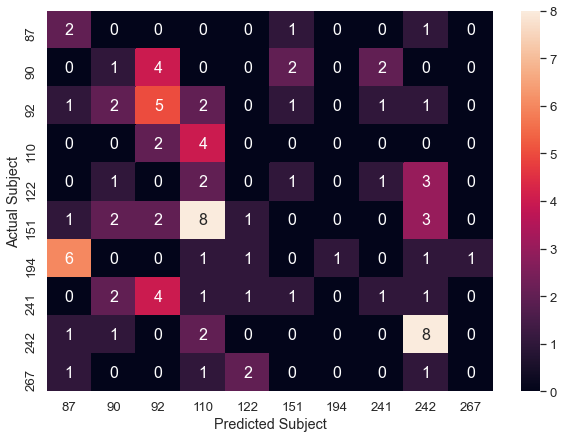

In [147]:
df_cm = pd.crosstab(y_test, y_pred,rownames=['Actual Subject'], colnames=['Predicted Subject'])
plt.figure(figsize=(10,7))
sns.set(font_scale=1.2) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from numpy import mean
from numpy import std

In [159]:
steps = [('m', RandomForestClassifier())]
model = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


In [160]:
n_scores

array([0.19791667, 0.19791667, 0.17708333, 0.19791667, 0.23036649,
       0.15625   , 0.19791667, 0.19270833, 0.21354167, 0.15706806,
       0.19791667, 0.11458333, 0.15104167, 0.1875    , 0.19895288])

In [161]:
mean(n_scores), std(n_scores)

(0.18457860674810936, 0.0279830174386028)

In [162]:
steps = [('pca', PCA(n_components=10)), ('m', RandomForestClassifier())]
model = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


In [163]:
n_scores

array([0.23958333, 0.25520833, 0.203125  , 0.23958333, 0.2408377 ,
       0.234375  , 0.24479167, 0.25      , 0.24479167, 0.2408377 ,
       0.21354167, 0.21875   , 0.19791667, 0.265625  , 0.20942408])

In [164]:
mean(n_scores), std(n_scores)

(0.23322607620709715, 0.019315313366094232)

In [166]:
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=10)), ('m', RandomForestClassifier())])

In [167]:
y_pred = model.predict(X_test)
# reversefactor = dict(zip(range(3),definitions))
# y_test = np.vectorize(reversefactor.get)(y_test)
# y_pred = np.vectorize(reversefactor.get)(y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['Actual Subject'], colnames=['Predicted Subject']))

Predicted Subject  87   90   92   110  122  151  194  241  242  267
Actual Subject                                                     
87                   1    0    0    0    0    0    1    0    1    1
90                   0    2    1    2    1    1    0    2    0    0
92                   0    2    5    1    1    0    1    3    0    0
110                  0    1    1    3    0    1    0    0    0    0
122                  0    2    0    2    1    0    1    1    1    0
151                  1    2    2    3    3    4    0    2    0    0
194                  5    0    0    0    0    0    4    0    1    1
241                  1    1    0    0    2    0    2    2    1    2
242                  2    0    0    1    0    1    0    2    5    1
267                  1    0    0    0    0    1    1    0    0    2


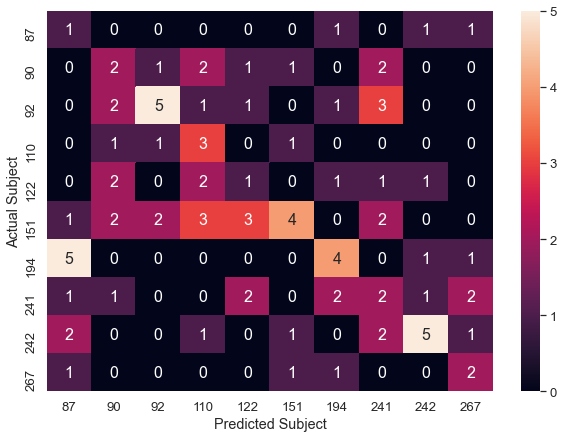

In [168]:
df_cm = pd.crosstab(y_test, y_pred,rownames=['Actual Subject'], colnames=['Predicted Subject'])
plt.figure(figsize=(10,7))
sns.set(font_scale=1.2) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()